In [91]:
from google.colab import files
files.upload()

Saving admission_prediction.csv to admission_prediction (3).csv


{'admission_prediction.csv': b'Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit\r\n1,337,118,4,4.5,4.5,9.65,1,0.92\r\n2,324,107,4,4,4.5,8.87,1,0.76\r\n3,,104,3,3,3.5,8,1,0.72\r\n4,322,110,3,3.5,2.5,8.67,1,0.8\r\n5,314,103,2,2,3,8.21,0,0.65\r\n6,330,115,5,4.5,3,9.34,1,0.9\r\n7,321,109,,3,4,8.2,1,0.75\r\n8,308,101,2,3,4,7.9,0,0.68\r\n9,302,102,1,2,1.5,8,0,0.5\r\n10,323,108,3,3.5,3,8.6,0,0.45\r\n11,325,106,3,3.5,4,8.4,1,0.52\r\n12,327,111,4,4,4.5,9,1,0.84\r\n13,,112,4,4,4.5,9.1,1,0.78\r\n14,307,109,3,4,3,8,1,0.62\r\n15,311,104,3,3.5,2,8.2,1,0.61\r\n16,314,105,3,3.5,2.5,8.3,0,0.54\r\n17,317,107,3,4,3,8.7,0,0.66\r\n18,319,106,3,4,3,8,1,0.65\r\n19,318,110,3,4,3,8.8,0,0.63\r\n20,303,102,3,3.5,3,8.5,0,0.62\r\n21,312,107,3,3,2,7.9,1,0.64\r\n22,325,114,4,3,2,8.4,0,0.7\r\n23,328,116,5,5,5,9.5,1,0.94\r\n24,,119,5,5,4.5,9.7,1,0.95\r\n25,336,119,5,4,3.5,9.8,1,0.97\r\n26,340,120,5,4.5,4.5,9.6,1,0.94\r\n27,322,109,5,4.5,3.5,8.8,0,0.76\r\n28,298,98,2,1.5,2.5,7.5,

In [92]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sample_data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [93]:
df = pd.read_csv('admission_prediction.csv')
df.head() 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [112]:
def adj_r2(x,y):
  
  r2 = lr.score(x,y)
  n = x.shape[0]
  p = x.shape[1]
  adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
  return adjusted_r2

In [95]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [96]:
df['University Rating'].isna().sum()

15

In [97]:
df['University Rating'].unique()

array([ 4.,  3.,  2.,  5., nan,  1.])

In [98]:
df['University Rating'] = df['University Rating'].fillna(df['University Rating'].median())
df['University Rating'].unique()

array([4., 3., 2., 5., 1.])

In [99]:
df['TOEFL Score'].mean()

107.18775510204081

In [100]:
df['TOEFL Score'] = df['TOEFL Score'].fillna(df['TOEFL Score'].mean())
df['TOEFL Score'].unique()

array([118.       , 107.       , 104.       , 110.       , 103.       ,
       115.       , 109.       , 101.       , 102.       , 108.       ,
       106.       , 111.       , 112.       , 105.       , 114.       ,
       116.       , 119.       , 120.       ,  98.       ,  93.       ,
        99.       ,  97.       , 117.       , 113.       , 100.       ,
       107.1877551,  95.       ,  96.       ,  94.       ,  92.       ])

In [101]:
df['TOEFL Score'].isna().sum()

0

In [102]:
df['GRE Score'].isna().sum()

15

In [104]:
df['GRE Score']  = df['GRE Score'].fillna(df['GRE Score'].mean())
df['GRE Score'].unique()




array([337.        , 324.        , 316.55876289, 322.        ,
       314.        , 330.        , 321.        , 308.        ,
       302.        , 323.        , 325.        , 327.        ,
       307.        , 311.        , 317.        , 319.        ,
       318.        , 303.        , 312.        , 328.        ,
       336.        , 340.        , 298.        , 295.        ,
       310.        , 300.        , 338.        , 331.        ,
       320.        , 304.        , 316.        , 313.        ,
       332.        , 326.        , 329.        , 339.        ,
       334.        , 309.        , 315.        , 301.        ,
       296.        , 294.        , 299.        , 306.        ,
       305.        , 290.        , 335.        , 333.        ,
       297.        , 293.        ])

In [105]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [106]:
df.drop('Serial No.', inplace = True, axis = 1)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


In [107]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

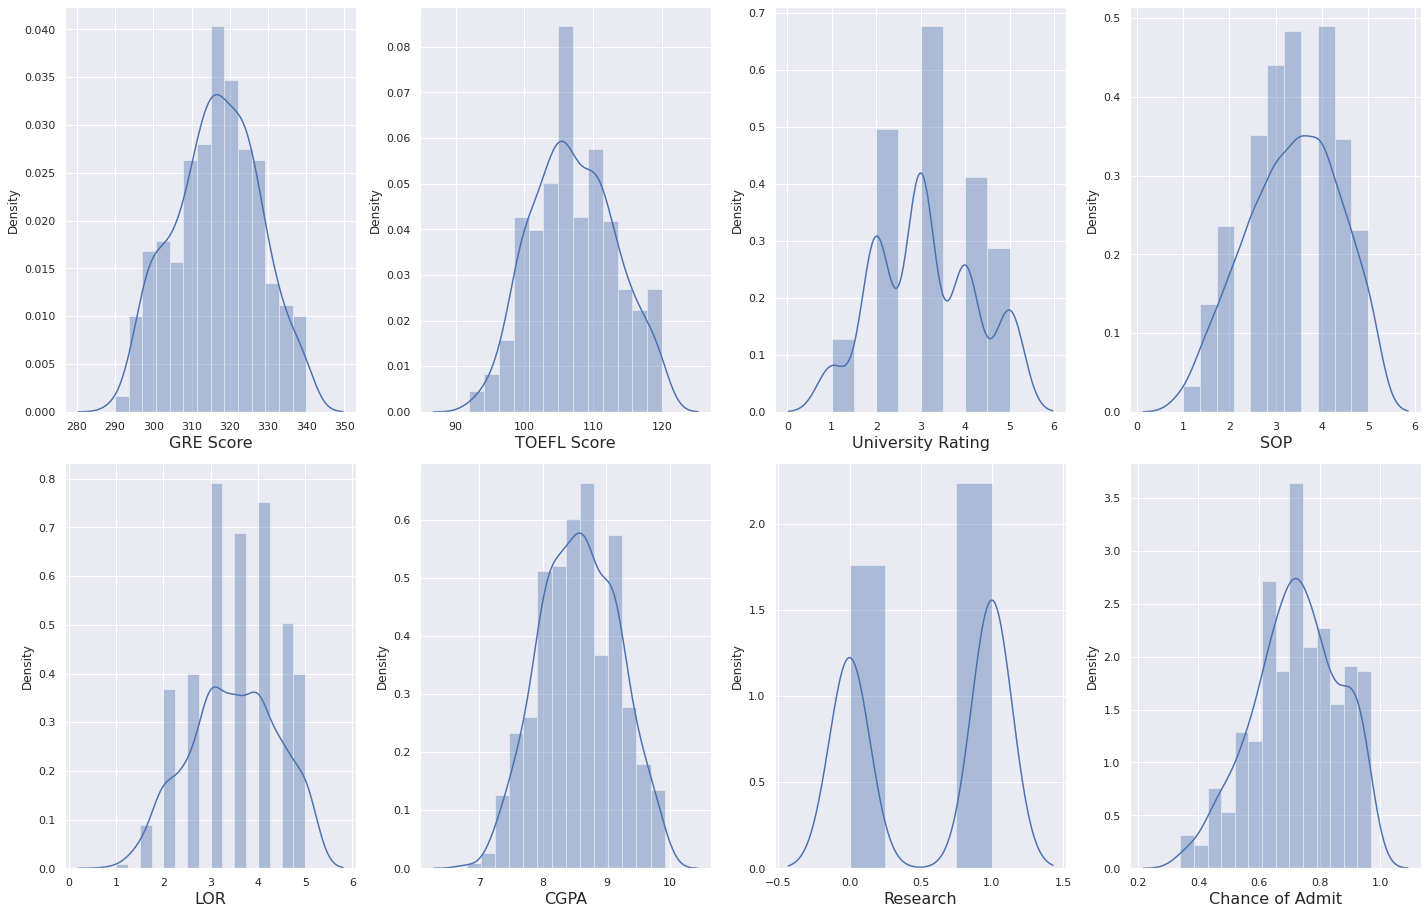

In [108]:
plt.figure(figsize=(20,25))
plotnumber = 1
for column in df:
  if plotnumber<=len(df.columns):
    ax = plt.subplot(4,4,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=16)
    plotnumber += 1

plt.tight_layout()
    
   

In [109]:
y = df['Chance of Admit']
X = df.drop(columns=['Chance of Admit'])
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0


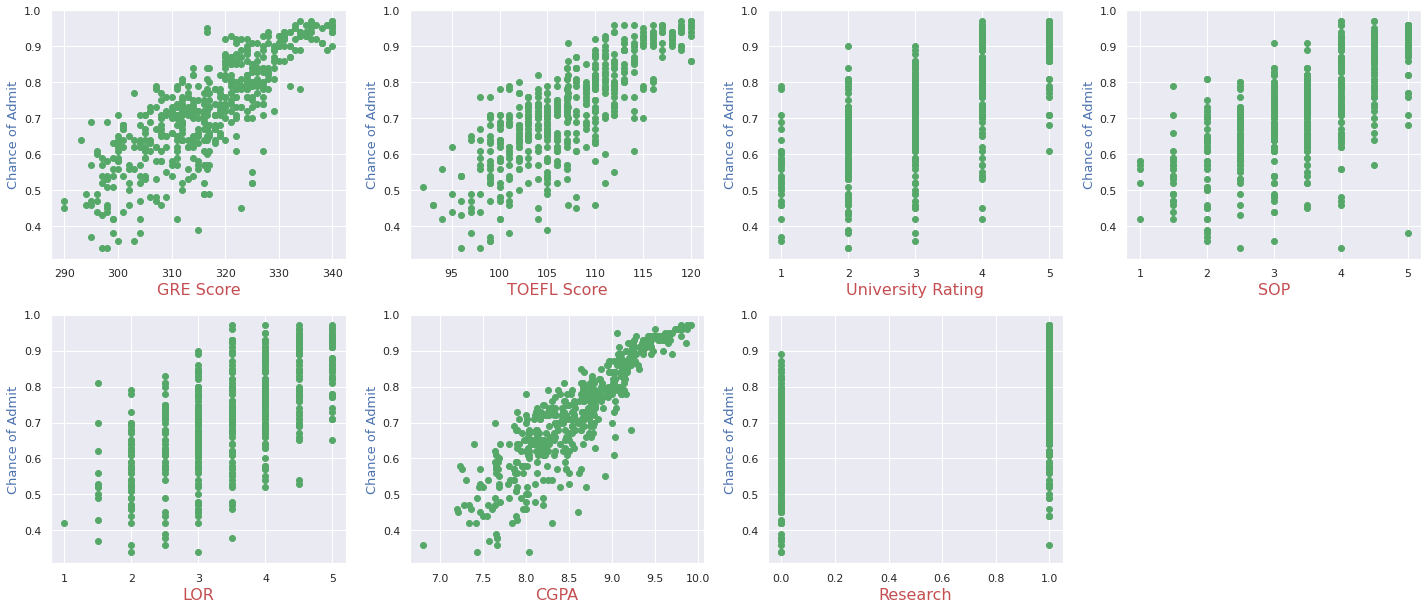

In [110]:
plt.figure(figsize=(20,25))
plotnumber = 1
for column in X:
  if plotnumber<=len(X.columns):
    ax = plt.subplot(6,4,plotnumber)
    plt.scatter(X[column],y,color='g')
    plt.xlabel(column,fontsize=16,color='r')
    plt.ylabel('Chance of Admit',fontsize=13,color='b')
    plotnumber += 1

plt.tight_layout()
    

In [111]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(X)
print(x_scaled)


[[ 1.84274116e+00  1.78854223e+00  7.82009548e-01 ...  1.09894429e+00
   1.77680627e+00  8.86405260e-01]
 [ 6.70814288e-01 -3.10581135e-02  7.82009548e-01 ...  1.09894429e+00
   4.85859428e-01  8.86405260e-01]
 [ 5.12433309e-15 -5.27312752e-01 -1.04622593e-01 ...  1.73062093e-02
  -9.54042814e-01  8.86405260e-01]
 ...
 [ 1.21170361e+00  2.11937866e+00  1.66864169e+00 ...  1.63976333e+00
   1.62785086e+00  8.86405260e-01]
 [-4.10964364e-01 -6.92730965e-01  7.82009548e-01 ...  1.63976333e+00
  -2.42366993e-01 -1.12815215e+00]
 [ 9.41258951e-01  9.61451165e-01  7.82009548e-01 ...  1.09894429e+00
   7.67219636e-01 -1.12815215e+00]]


In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = x_scaled
vif = pd.DataFrame()
print(vif)

vif['VIF'] = [variance_inflation_factor(variables,i) for i in range(variables.shape[1])]

vif['Features'] = X.columns

vif

Empty DataFrame
Columns: []
Index: []


,VIF,Features
0,4.152735,GRE Score
1,3.793345,TOEFL Score
2,2.517272,University Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


In [118]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 355)
p = x_train.shape
p

(375, 7)

In [87]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [88]:
import pickle
filename = 'Finalized_model.pickle'
pickle.dump(lr,open(filename,'wb'))

In [90]:
loaded_model = pickle.load(open(filename,'rb'))
p = loaded_model.predict(scalar.transform([[300,110,23,50,5,10,1]]))
print(p)

[1.0556981]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [57]:
print('train r2 score : {}'.format(lr.score(x_train,y_train)))

train r2 score : 0.8415250484247909


In [58]:
print('train adjusted r2 score : {}'.format(adj_r2(x_train,y_train)))


train adjusted r2 score : 0.8385023654247188


In [59]:
print('test r2 score : {}'.format(lr.score(x_test,y_test)))

test r2 score : 0.7534898831471066


In [60]:
print('test adjusted r2 score : {}'.format(adj_r2(x_test,y_test)))

test adjusted r2 score : 0.7387414146174464


In [61]:
lasscv = LassoCV(alphas = None, cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


LassoCV(cv=10, max_iter=100000, normalize=True)

In [62]:
alpha = lasscv.alpha_
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)



Lasso(alpha=3.0341655445178153e-05)

In [63]:
print('lasso test r2 score : {}'.format(lasso_reg.score(x_test,y_test)))

lasso test r2 score : 0.7534654960492284


In [64]:
alphas = np.random.uniform(low = 0, high =10, size = (50,))
ridgecv = RidgeCV(alphas = alphas, cv = 10, normalize = True)
ridgecv.fit(x_train,y_train)
ridgecv.alpha_
ridge_model = Ridge(ridgecv.alpha_)
ridge_model.fit(x_train,y_train)


Streaming output truncated to the last 5000 lines.
Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the d

Ridge(alpha=0.0120440643690356)

In [65]:
print('ridge model r2 score : {}'.format(ridge_model.score(x_test,y_test)))

ridge model r2 score : 0.7534957994461255


In [68]:
elasticCV = ElasticNetCV(alphas = None, cv =10)
elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [70]:
elasticCV.alpha_
elasticCV.l1_ratio 

0.5

In [72]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_ , l1_ratio = elasticCV.l1_ratio )
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.0011069728449315508)

In [73]:
elasticnet_reg.score(x_test,y_test)

0.7531695370639867